# Python在存活分析上的應用

## 什麼是存活分析？

## 觀察一定時間內發生想要觀察事件的機率


* 食道癌病人開刀治療，跟只選擇放射線治療哪種6年內存活比例較高（重點在死亡）
* H0: 食道癌病人開刀治療與只選擇放射線治療的6年內存活比例相差不多
* Ha: 食道癌病人開刀治療比只選擇放射線治療的6年內存活比例高

* 常常吃地溝油的人會不會比較容易得到食道癌

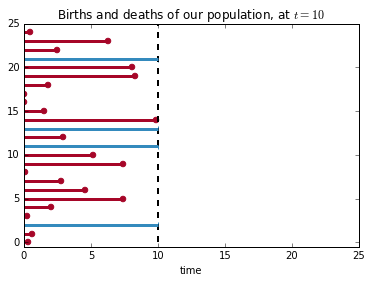

Observed lifetimes at time 10:
[  0.46601368   6.25636566   2.48679508  10.           8.09169069
   8.322287     1.79785292   0.01114367   0.03511908   1.46718548
   9.85096894  10.           2.88478754  10.           5.15491054
   7.37835585   0.04888716   2.75531077   4.56952755   7.36740276
   2.04358292   0.20503552  10.           0.62641073   0.30387226]


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from lifelines.plotting import plot_lifetimes
from numpy.random import uniform, exponential

N = 25
current_time = 10
actual_lifetimes = np.array([[exponential(12), exponential(2)][uniform()<0.5] for i in range(N)])
observed_lifetimes = np.minimum(actual_lifetimes,current_time)
observed= actual_lifetimes < current_time

plt.xlim(0,25)
plt.vlines(10,0,30,lw=2, linestyles="--")
plt.xlabel('time')
plt.title('Births and deaths of our population, at $t=10$')
plot_lifetimes(observed_lifetimes, event_observed=observed)
print "Observed lifetimes at time %d:\n"%(current_time), observed_lifetimes


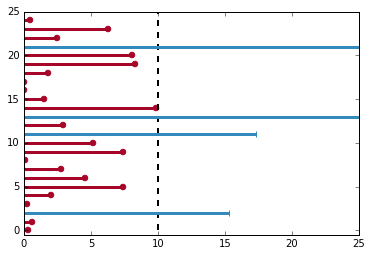

In [2]:
plt.xlim(0,25)
plt.vlines(10,0,30,lw=2,linestyles="--")
plot_lifetimes(actual_lifetimes, event_observed=observed)

## 常用的統計方法

* Logistic regression
* Kaplan-Meier curve (Log-rank test)
* Cox Proportional Hazard Regression Model

##  工具

* R: coxph
* SAS: proc phreg, proc lifetest
* SPSS: Cox Proportional Hazard Regression Model
* Python: lifelines, statsmodels, scikit-learn
* And other many tools.

## R v.s. Python

* 統計工具
* 資料處理能力
* 學習的難易度
* 資料再處理的難易度
* 專案管理的難易度
* 訓練新人的難易度

## Demo 

John Fox, Sanford Weisberg (2011). Cox Proportional-Hazards Regression for Survival Data in R. 
http://socserv.mcmaster.ca/jfox/Books/Companion/data/Rossi.txt

In [6]:
datasets = pd.read_csv("Rossi.csv", index_col=0)
T=datasets["week"]
E=datasets["arrest"]

In [7]:
datasets.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio,educ,...,emp43,emp44,emp45,emp46,emp47,emp48,emp49,emp50,emp51,emp52
1,20,1,no,27,black,no,not married,yes,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,1,no,18,black,no,not married,yes,8,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25,1,no,19,other,yes,not married,yes,13,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52,0,yes,23,black,yes,married,yes,1,5,...,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
5,52,0,no,19,other,yes,not married,yes,3,3,...,no,no,no,no,no,no,no,no,no,no


In [8]:
# Kaplan-Meier Curve
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
T=datasets["week"]
E=datasets["arrest"]
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 432 observations, 318 censored>

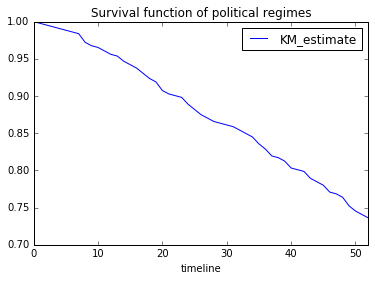

In [9]:
kmf.survival_function_.plot()
plt.title('Survival function of political regimes');

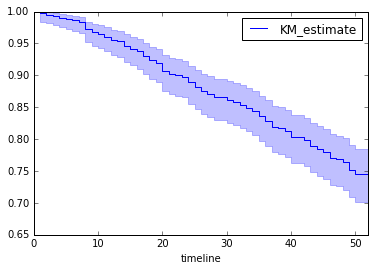

In [10]:
kmf.plot()

In [11]:
kmf.median_

inf

KeyError: 'democracy'

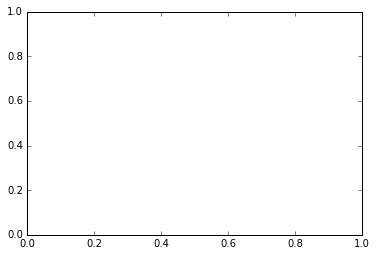

In [13]:
ax = plt.subplot(111)

dem = (datasets["democracy"] == "Democracy")
kmf.fit(T[dem], event_observed=C[dem], label="Democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=True)
kmf.fit(T[~dem], event_observed=C[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=True)

plt.ylim(0,1);
plt.title("Lifespans of different global regimes");

In [16]:
ax = subplot(111)

t = np.linspace(0,50,51)
kmf.fit(T[dem], event_observed=C[dem], timeline=t, label="Democratic Regimes")
ax = kmf.plot(ax=ax)
print "Median survival time of democratic:", kmf.median_

kmf.fit(T[~dem], event_observed=C[~dem], timeline=t, label="Non-democratic Regimes")
ax = kmf.plot(ax=ax)
print "Median survival time of non-democratic:", kmf.median_

plt.ylim(0,1)
plt.title("Lifespans of different global regimes");

NameError: name 'subplot' is not defined